### ARIMA
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR(P): Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I(d): Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA(q): Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [18]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:xlabel='Month'>

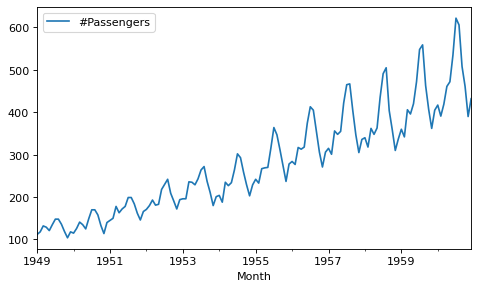

In [20]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
df.dropna(inplace=True)
df.plot()

In [21]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

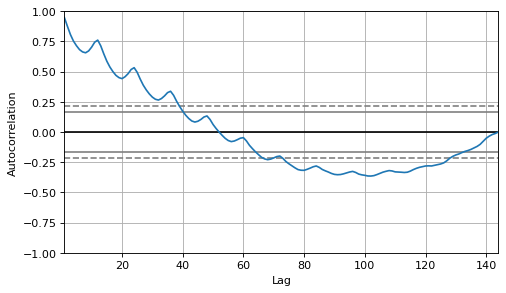

In [22]:
autocorrelation_plot(df)
plt.show()

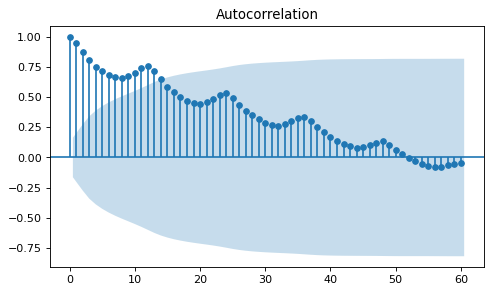

In [23]:
plot_acf(df, lags=60)
plt.show()

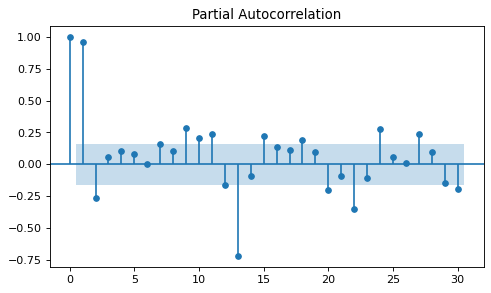

In [24]:
plot_pacf(df, lags=30)
plt.show()

In [25]:
result=adfuller(df['#Passengers'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Test Statistic : 0.8153688792060497
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations : 130
weak evidence against null hypothesis,indicating it is non-stationary 


In [26]:
df['Sales First Difference'] = df['#Passengers'] - df['#Passengers'].shift(1)
df['Seasonal First Difference']=df['#Passengers']-df['#Passengers'].shift(12)
df.head(15)

,#Passengers,Sales First Difference,Seasonal First Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [27]:
df['Sales First Dif'] = df['#Passengers'].diff()
df['Seasonal First Dif']=df['#Passengers'].diff(12)
df.head(15)

,#Passengers,Sales First Difference,Seasonal First Difference,Sales First Dif,Seasonal First Dif
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,6.0,NaN
1949-03-01,132,14.0,NaN,14.0,NaN
1949-04-01,129,-3.0,NaN,-3.0,NaN
1949-05-01,121,-8.0,NaN,-8.0,NaN
1949-06-01,135,14.0,NaN,14.0,NaN
1949-07-01,148,13.0,NaN,13.0,NaN
1949-08-01,148,0.0,NaN,0.0,NaN
1949-09-01,136,-12.0,NaN,-12.0,NaN


In [28]:
# Again testing if data is stationary
adfuller(df['Seasonal First Difference'].dropna())

(-3.3830207264924796,
 0.011551493085515008,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

In [29]:
# Again testing if data is stationary
adfuller(df['Sales First Difference'].dropna())

(-2.8292668241699963,
 0.05421329028382592,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [30]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

<AxesSubplot:xlabel='Month'>

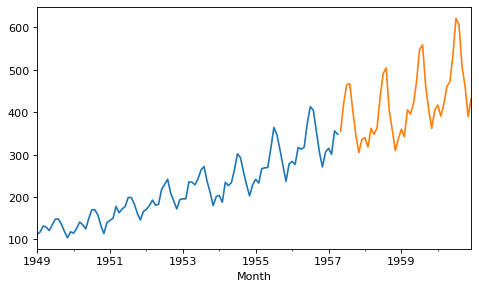

In [31]:
#plotting the data
train['#Passengers'].plot()
valid['#Passengers'].plot()

In [32]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import AutoARIMA

In [33]:
#building the model
model = pm.auto_arima(train['#Passengers'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -443.946
Date:                Wed, 23 Jun 2021   AIC                            895.892
Time:                        09:46:13   BIC                            906.272
Sample:                             0   HQIC                           900.092
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4654      0.133      3.489      0.000       0.204       0.727
ma.L1         -0.2326      0.141     -1.653      0.098      -0.508       0.043
ma.L2         -0.5172      0.099     -5.224      0.000      -0.711      -0.323
sigma2       456.8414     83.534      5.469      0.000     293.118     620.565
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.49   Prob(JB):                         0.15
Heteroskedasticity (H):               3.72   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
forecasts = model.predict(n_periods=valid.shape[0])
forecasts
valid['forecasts'] = forecasts


In [35]:
valid.head()

,#Passengers,Sales First Difference,Seasonal First Difference,Sales First Dif,Seasonal First Dif,forecasts
Month,,,,,,
1957-05-01,355,7.0,37.0,7.0,37.0,323.394872
1957-06-01,422,67.0,48.0,67.0,48.0,324.807429
1957-07-01,465,43.0,52.0,43.0,52.0,325.464901
1957-08-01,467,2.0,62.0,2.0,62.0,325.770920
1957-09-01,404,-63.0,49.0,-63.0,49.0,325.913356


In [37]:
#building the model
model = pm.auto_arima(train['#Passengers'], seasonal=True, m=12)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Wed, 23 Jun 2021   AIC                            644.203
Time:                                    09:46:48   BIC                            651.601
Sample:                                         0   HQIC                           647.182
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
forecasts = model.predict(n_periods=valid.shape[0])
forecasts
valid['forecasts'] = forecasts

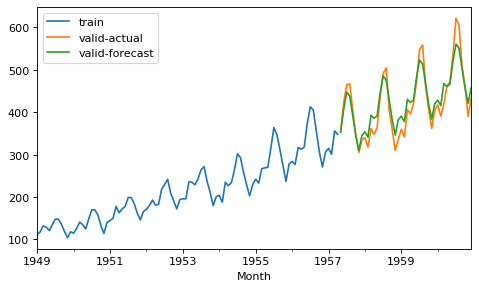

In [39]:
train["#Passengers"].plot()
valid["#Passengers"].plot()
valid["forecasts"].plot()
labels = ['train', 'valid-actual', 'valid-forecast']
plt.legend(labels)